In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('~/Downloads/Fish.csv')

In [4]:
df.head(15)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [5]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [6]:
col = df.loc[: , "Length1":"Length3"]

In [8]:
df["Length"]=col.mean(axis=1)
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Length
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,26.200000
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,27.166667
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,27.166667
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,29.600000
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,29.833333


In [18]:
df.shape

(159, 6)

In [19]:
df.isnull().values.any()

False

In [22]:
df.describe()

,Weight,Length3,Height,Width,Length
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,31.227044,8.970994,4.417486,28.629979
std,357.978317,11.610246,4.286208,1.685804,10.756686
min,0.000000,8.800000,1.728400,1.047600,8.233333
25%,120.000000,23.150000,5.944800,3.385650,20.983333
50%,273.000000,29.400000,7.786000,4.248500,27.266667
75%,650.000000,39.650000,12.365900,5.584500,36.000000
max,1650.000000,68.000000,18.957000,8.142000,63.466667


In [24]:
df.corr()

,Weight,Length3,Height,Width,Length
Weight,1.000000,0.923044,0.724345,0.886507,0.920817
Length3,0.923044,1.000000,0.703409,0.878520,0.997214
Height,0.724345,0.703409,1.000000,0.792881,0.659481
Width,0.886507,0.878520,0.792881,1.000000,0.874757
Length,0.920817,0.997214,0.659481,0.874757,1.000000


<AxesSubplot:xlabel='Weight', ylabel='Length'>

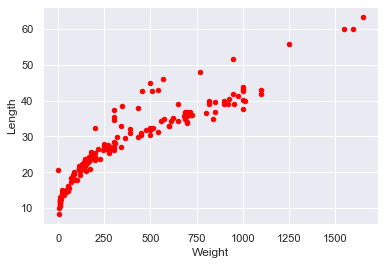

In [103]:
df.plot.scatter(x= 'Weight', y = 'Length', c = 'red')

<AxesSubplot:xlabel='Length', ylabel='Weight'>

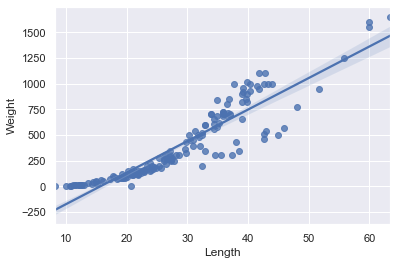

In [33]:
sns.regplot(x='Length',y='Weight', data = df)

In [83]:
x = df['Length']

In [89]:
x = x.values.reshape(-1,1)

In [90]:
x.shape

(159, 1)

In [91]:
 y = df['Weight']

In [92]:
y = y.values.reshape(-1,1)

In [93]:
y.shape

(159, 1)

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 34)


In [96]:
model = LinearRegression()

In [97]:
model.fit(x_train,y_train)

LinearRegression()

In [98]:
print(model.coef_)

[[30.88604923]]


In [99]:
print(model.intercept_)

[-474.49945595]


In [100]:
predictions = model.predict(x_test)

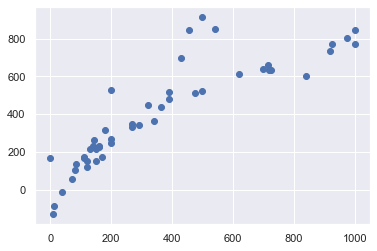

In [101]:
plt.scatter(y_test,predictions)

In [111]:
df.head()

,Weight,Length3,Height,Width,Length
0,242.0,30.0,11.5200,4.0200,26.200000
1,290.0,31.2,12.4800,4.3056,27.166667
2,340.0,31.1,12.3778,4.6961,27.166667
3,363.0,33.5,12.7300,4.4555,29.600000
4,430.0,34.0,12.4440,5.1340,29.833333


<AxesSubplot:xlabel='Weight', ylabel='Length'>

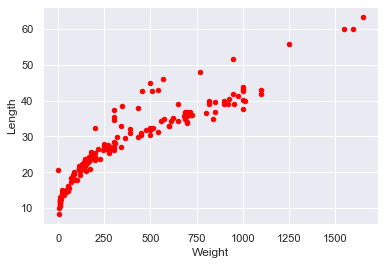

In [104]:
df.plot.scatter(x= 'Weight', y = 'Length', c = 'red')

(array([ 2.,  2.,  1.,  1.,  5., 17.,  7.,  6.,  4.,  3.]),
 array([-415.37275944, -350.28080322, -285.18884699, -220.09689077,
        -155.00493454,  -89.91297832,  -24.82102209,   40.27093414,
         105.36289036,  170.45484659,  235.54680281]),
 <BarContainer object of 10 artists>)

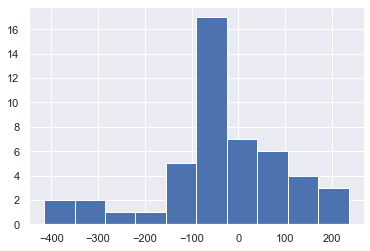

In [106]:
plt.hist(y_test-predictions)

In [107]:
from sklearn import metrics

In [108]:
metrics.mean_absolute_error(y_test,predictions)

110.19817305530222

In [109]:
metrics.mean_squared_error(y_test,predictions)

21703.032760291186

In [110]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

147.3194921260971

In [112]:
df.describe()

,Weight,Length3,Height,Width,Length
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,31.227044,8.970994,4.417486,28.629979
std,357.978317,11.610246,4.286208,1.685804,10.756686
min,0.000000,8.800000,1.728400,1.047600,8.233333
25%,120.000000,23.150000,5.944800,3.385650,20.983333
50%,273.000000,29.400000,7.786000,4.248500,27.266667
75%,650.000000,39.650000,12.365900,5.584500,36.000000
max,1650.000000,68.000000,18.957000,8.142000,63.466667
